In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import  tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing 

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url,names=column_names,na_values='?',comment='\t',sep=' ',skipinitialspace=True)
  

In [ ]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.shape

(398, 8)

In [ ]:
# clean
dataset =dataset.dropna()

In [ ]:
dataset.shape

(392, 8)

In [ ]:
# one hot encoding categorical variable origin

origin = dataset.pop("Origin")
dataset["USA"]=(origin==1)*1
dataset["Europe"]=(origin==2)*1
dataset["Japan"]=(origin==3)*1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [ ]:
# split dataset into train and test
train_dataset=dataset.sample(frac=0.8,random_state=1)
test_dataset=dataset.drop(train_dataset.index)

print(train_dataset.shape,test_dataset.shape)

(314, 10) (78, 10)


In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.532166,7.951761,9.0,17.50,22.2,29.00,46.6
Cylinders,314.0,5.490446,1.703662,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.472930,105.269835,68.0,105.00,151.0,265.75,455.0
Horsepower,314.0,104.108280,38.153395,46.0,75.25,95.0,125.00,225.0
Weight,314.0,2972.388535,844.377092,1613.0,2223.75,2818.5,3608.00,4997.0
Acceleration,314.0,15.509236,2.797765,8.0,13.50,15.5,17.00,24.6
Model Year,314.0,76.012739,3.678775,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.630573,0.483420,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.191083,0.393782,0.0,0.00,0.0,0.00,1.0


In [ ]:
# split label set

In [ ]:
train_df = train_dataset.copy()
test_df = test_dataset.copy()

train_label =train_df.pop("MPG")
test_label=test_df.pop("MPG")

In [ ]:
train_label.shape,test_label.shape

((314,), (78,))

In [ ]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_df[feature], train_label, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()

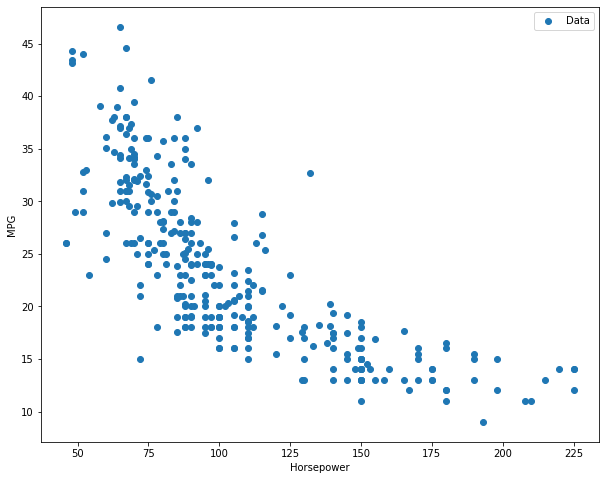

In [ ]:
plot('Horsepower')

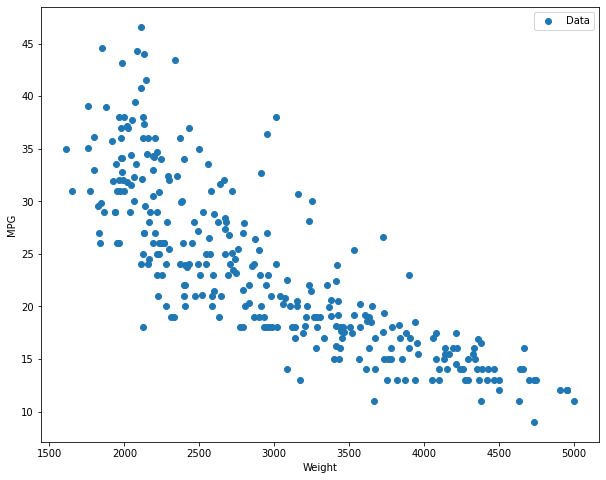

In [ ]:
plot('Weight')

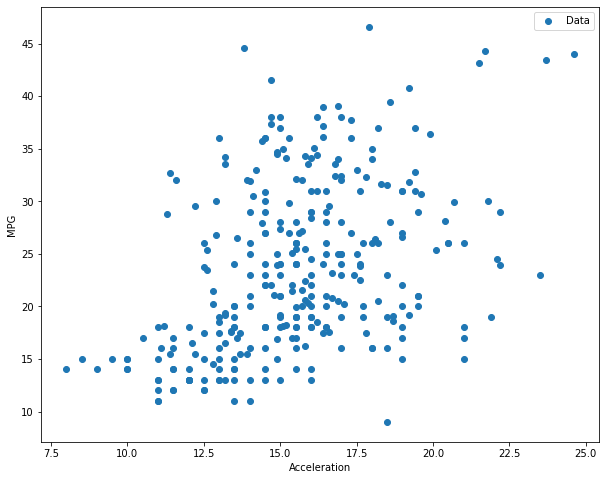

In [ ]:
plot('Acceleration')

In [ ]:
# normalizing


print(train_df.describe().transpose()[["mean","std"]])

# 
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(train_df))
print(normalizer.mean.numpy())

                     mean         std
Cylinders        5.490446    1.703662
Displacement   195.472930  105.269835
Horsepower     104.108280   38.153395
Weight        2972.388535  844.377092
Acceleration    15.509236    2.797765
Model Year      76.012739    3.678775
USA              0.630573    0.483420
Europe           0.178344    0.383413
Japan            0.191083    0.393782
[[5.49044609e+00 1.95472946e+02 1.04108284e+02 2.97238867e+03
  1.55092382e+01 7.60127411e+01 6.30573273e-01 1.78343967e-01
  1.91082805e-01]]


In [ ]:
train_df.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
82,4,120.0,97.0,2506.0,14.5,72,0,0,1
167,4,97.0,75.0,2171.0,16.0,75,0,0,1
356,4,108.0,75.0,2350.0,16.8,81,0,0,1
120,4,121.0,112.0,2868.0,15.5,73,0,1,0
385,4,91.0,67.0,1995.0,16.2,82,0,0,1


In [ ]:
first_row = np.array(train_df[:1])
print("first_row")
print(first_row)

first_row
[[4.000e+00 1.200e+02 9.700e+01 2.506e+03 1.450e+01 7.200e+01 0.000e+00
  0.000e+00 1.000e+00]]


In [ ]:
print("normalized ")
print(normalizer(first_row).numpy())

normalized 
[[-0.8762448  -0.71809196 -0.18660541 -0.5532281  -0.361306   -1.092523
  -1.3064824  -0.4658909   2.0575068 ]]


In [ ]:
# make single feature model

single_feature = "Horsepower"
single_feature_data=np.array(train_df[single_feature])
print(single_feature_data.shape,train_df.shape)



(314,) (314, 9)


In [ ]:
single_feature_data

array([ 97.,  75.,  75., 112.,  67.,  83.,  69., 150.,  92.,  72., 115.,
        76., 130.,  70.,  84., 140.,  84.,  48., 220., 100.,  75., 110.,
       150., 170., 198., 150.,  68., 100., 110.,  84., 145.,  88., 155.,
       112., 105., 140.,  95., 105.,  67.,  88., 190., 175., 122., 100.,
       100., 110., 150.,  68., 100., 215., 150.,  95.,  90.,  84.,  62.,
        97., 115.,  85.,  90.,  60.,  85.,  86.,  65., 110.,  90.,  90.,
        88., 160.,  71., 180.,  92., 125., 150.,  78., 113.,  80., 225.,
       150., 165.,  84., 110.,  83.,  65.,  74., 175., 110.,  67.,  80.,
        67.,  81.,  80.,  85., 130., 210., 198., 115., 140., 115.,  85.,
       155.,  88.,  72., 100.,  75.,  75.,  68.,  88.,  52., 153., 105.,
        65.,  76.,  68.,  90., 150.,  90., 110., 158.,  88.,  82.,  52.,
        88., 125.,  65., 150.,  54.,  80., 152.,  97.,  65.,  74.,  90.,
       150., 100.,  95., 149.,  95.,  97., 180., 150.,  85.,  76., 107.,
       190.,  95.,  97.,  70., 130., 180.,  53.,  7

In [ ]:
# normalizer
single_feature_normalizer  =preprocessing.Normalization(axis=None)

#

# adapting data
single_feature_normalizer.adapt(single_feature_data)

In [ ]:
single_feature_normalizer.adapt_mean

<tf.Variable 'mean:0' shape=() dtype=float32, numpy=104.108284>

In [ ]:
# creating single sequencial model  
# model y=ax+b

# single_feature_model  = keras.models.Sequential([
#     single_feature_normalizer,
#     layers.Dense(units=1) # linear regression units (one output)
# ])

ValueError: ignored

In [ ]:
horsepower = np.array(train_df['Horsepower'])

# 
horsepower_normalizer = layers.Normalization(input_shape=[1,],axis=None)
horsepower_normalizer.adapt(horsepower)

In [ ]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])


In [ ]:
horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
horsepower_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss=keras.losses.MeanAbsoluteError()
)

In [ ]:
%%time
history = horsepower_model.fit(
    train_df['Horsepower'],
    train_label,
    epochs=1000,
    verbose=1,
    validation_split=0.2 #creating validation set using 20% of taining set
)

Epoch 1/1000
8/8 [==============================] - 3s 22ms/step - loss: 22.9548 - val_loss: 23.7280
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 22.1384 - val_loss: 22.9563
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 21.3313 - val_loss: 22.1707
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 20.5237 - val_loss: 21.4131
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 19.7123 - val_loss: 20.6465
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 18.9039 - val_loss: 19.8924
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 18.0987 - val_loss: 19.1338
Epoch 8/1000
8/8 [==============================] - 0s 5ms/step - loss: 17.3078 - val_loss: 18.3733
Epoch 9/1000
8/8 [==============================] - 0s 5ms/step - loss: 16.5416 - val_loss: 17.6364
Epoch 10/1000
8/8 [==============================] - 0s 5ms/step - loss: 15.7821 - val_loss: 16.829

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

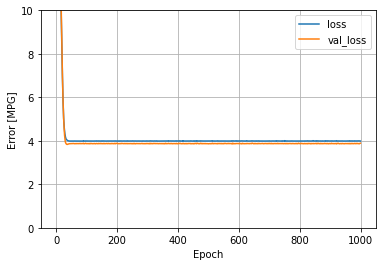

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results["horsepower_model"] = horsepower_model.evaluate(
    test_df['Horsepower'],
    test_label,
    verbose=1
)

3/3 [==============================] - 0s 3ms/step - loss: 3.1579


In [ ]:
test_results

{'horsepower_model': 3.1578588485717773}

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_df['Horsepower'], train_label, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

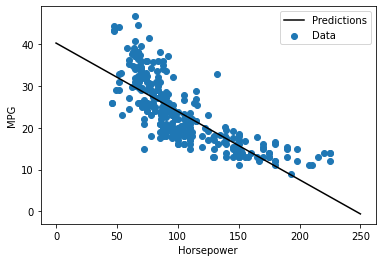

In [ ]:
plot_horsepower(x, y)

In [ ]:
# Linear regression with multiple inputs 

multiple_normalizer = layers.Normalization(axis=-1)

multiple_normalizer.adapt(np.array(train_df))

model = tf.keras.Sequential([
    multiple_normalizer,
    layers.Dense(units=1)
])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss=keras.losses.MeanAbsoluteError()
)


In [ ]:
%%time
history = model.fit(
    train_df,
    train_label,
    epochs=1000,
    verbose=1,
    validation_split=0.2 #creating validation set using 20% of taining set
)

Epoch 1/1000
8/8 [==============================] - 0s 17ms/step - loss: 23.1022 - val_loss: 23.4331
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 22.2003 - val_loss: 22.8238
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 21.3428 - val_loss: 22.1899
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 20.5100 - val_loss: 21.6266
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 19.6697 - val_loss: 21.1070
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 18.8039 - val_loss: 20.4454
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 18.0347 - val_loss: 19.7464
Epoch 8/1000
8/8 [==============================] - 0s 5ms/step - loss: 17.2543 - val_loss: 18.7963
Epoch 9/1000
8/8 [==============================] - 0s 5ms/step - loss: 16.4630 - val_loss: 18.0256
Epoch 10/1000
8/8 [==============================] - 0s 7ms/step - loss: 15.6932 - val_loss: 17.242

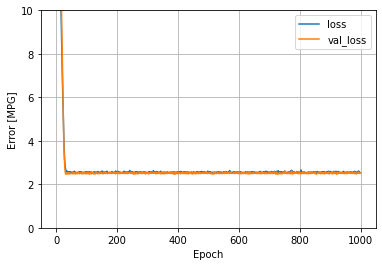

In [ ]:
plot_loss(history)

In [ ]:
# x = tf.linspace(0.0, 250, 251)
# y = model.predict(x)

In [ ]:
#  create dnn model using single varible

dnn_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1)
])



In [ ]:
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 64)                128       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
 dnn_model.compile(
     loss= tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(0.001)
    )

In [ ]:
%%time
history = dnn_model.fit(
    train_df['Horsepower'],
    train_label,
    epochs=100,
    verbose=1,
    validation_split=0.2 #creating validation set using 20% of taining set
)

Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 3.4126 - val_loss: 3.6687
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 3.3538 - val_loss: 3.6443
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 3.3572 - val_loss: 3.6160
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 3.3644 - val_loss: 3.6176
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 3.3525 - val_loss: 3.6334
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 3.3484 - val_loss: 3.6395
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 3.3494 - val_loss: 3.6367
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 3.3568 - val_loss: 3.6336
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 3.3460 - val_loss: 3.6242
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 3.3498 - val_loss: 3.6293
Epoch 11/100
8/8 [==========

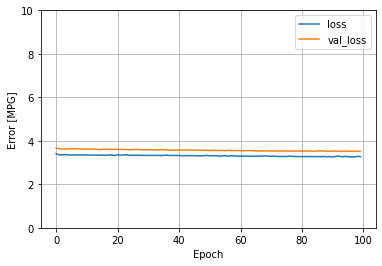

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_model.predict(x)

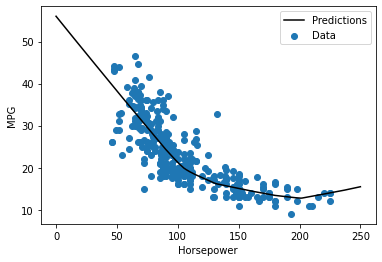

In [ ]:
plot_horsepower(x, y)

CPU times: user 4.22 s, sys: 354 ms, total: 4.57 s
Wall time: 4.14 s
